In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

In [57]:
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
# Train data wordt gemaakt voor verder gebruik
X_mf = heart_df.drop('target', axis=1)
y_mf = heart_df[['target']]
X_mf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [59]:
zeroedout = []
for i in range(int(X_mf.size * 0.3)):
    row = random.randint(0, len(X_mf) - 1)
    col = random.choice((X_mf).columns)
    zeroedout.append((row, col))

In [60]:
X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0)
rfc = RandomForestClassifier(random_state=0).fit(X_train_mf, y_train_mf)
rfc.score(X_test_mf, y_test_mf)

0.8157894736842105

In [61]:
for i in zeroedout:
    X_mf[i[1]][i[0]] = 0

X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0)
rfc = RandomForestClassifier(random_state=0).fit(X_train_mf, y_train_mf)
rfc.score(X_test_mf, y_test_mf)

0.8026315789473685

In [62]:
for i in zeroedout:
    X_mf[i[1]][i[0]] = X_mf[i[1]].mean()
    
X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0)
rfc = RandomForestClassifier(random_state=0).fit(X_train_mf, y_train_mf)
rfc.score(X_test_mf, y_test_mf)

0.7368421052631579

In [63]:
for i in zeroedout:
    X_mf[i[1]][i[0]] = X_mf[i[1]].mode()[0]
    
X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0)
rfc = RandomForestClassifier(random_state=0).fit(X_train_mf, y_train_mf)
rfc.score(X_test_mf, y_test_mf)

0.6973684210526315

In [64]:
for i in zeroedout:
    X_mf[i[1]][i[0]] = X_mf[i[1]].median()
    
X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0)
rfc = RandomForestClassifier(random_state=0).fit(X_train_mf, y_train_mf)
rfc.score(X_test_mf, y_test_mf)

0.7631578947368421

In [65]:
def proximityMatrix(model, X, normalize=True):      

    terminals = model.apply(X)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)

    for i in range(1, nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)

    if normalize:
        proxMat = proxMat / nTrees

    return proxMat


X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0, shuffle=True)
rfc = RandomForestClassifier(random_state=0).fit(X_train_mf, y_train_mf)

for redo in range(5):
    matrix = proximityMatrix(rfc, X_mf)
    binary_cols = ['sex','exang','cp','restecg','fbs','slope','ca','thal']

    for i in zeroedout:

        new_value = 0

        if i[1] in binary_cols:

            frequencies = X_mf[i[1]].value_counts(normalize=True)
            print(frequencies[])
            
            new_value = X_mf[i[1]].mode()[0]

        else:
            matrixsum = sum(matrix[i[0]])
            for enum, j in enumerate(matrix[i[0]]):
                new_value += (j / matrixsum) * X_mf[i[1]][enum]

        X_mf[i[1]][i[0]] = new_value

    X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, random_state=0)
    rfc = RandomForestClassifier(random_state=0).fit(X_train_mf, y_train_mf)
    print(rfc.score(X_test_mf, y_test_mf))

[0.52475248 0.47524752]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.60726073 0.38613861 0.00660066]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.52475248 0.47524752]
[0.88448845 0.11551155]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.74587459 0.25412541]
[0.60726073 0.38613861 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.88448845 0.11551155]
[0.60726073 0.38613861 0.00660066]
[0.88448845 0.11551155]
[0.52475248 0.47524752]
[0.52475248 0.47524752]
[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.74587459 0.25412541]
[0.60726073 0.38613861 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.88448845 0.11551155]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.52475248 0.47524752]
[0.74587459 0.25412541]
[0.52475248 0.47524752]
[0.69

[0.88448845 0.11551155]
[0.52475248 0.47524752]
[0.6039604  0.34983498 0.04620462]
[0.74587459 0.25412541]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.88448845 0.11551155]
[0.74587459 0.25412541]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.52475248 0.47524752]
[0.52475248 0.47524752]
[0.6039604  0.34983498 0.04620462]
[0.60726073 0.38613861 0.00660066]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.6039604  0.34983498 0.04620462]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.88448845 0.11551155]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.6039604  0.34983498 0.04620462]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.74587459 0.25412541]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.52475248 0.47524752]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.52475248 0.47524752]
[0.8844

[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.52475248 0.47524752]
[0.88448845 0.11551155]
[0.74587459 0.25412541]
[0.74587459 0.25412541]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.52475248 0.47524752]
[0.6039604  0.34983498 0.04620462]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.52475248 0.47524752]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.52475248 0.47524752]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.88448845 0.11551155]
[0.52475248 0.47524752]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.6039604  0.34983498 0.04620462]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.69306931 0.16171617 0.09570957 0.03960396 0.0

[0.52475248 0.47524752]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.60726073 0.38613861 0.00660066]
[0.6039604  0.34983498 0.04620462]
[0.60726073 0.38613861 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.88448845 0.11551155]
[0.60726073 0.38613861 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.52475248 0.47524752]
[0.60726073 0.38613861 0.00660066]
[0.6039604  0.34983498 0.04620462]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.74587459 0.25412541]
[0.6039604  0.34983498 0.04620462]
[0.74587459 0.25412541]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
0.75
[0.52475248 0.47524752]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.60726073 0.38613861 0.00660066]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.52475248 0.47524752]
[0.88448845 0.11551155]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.74587459 0.25412541]
[0.60726073 0.38613861 0.00660066]
[0.60726073 0.3

[0.58085809 0.2310231  0.1320132  0.05610561]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.88448845 0.11551155]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.52475248 0.47524752]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.60726073 0.38613861 0.00660066]
[0.88448845 0.11551155]
[0.60726073 0.38613861 0.00660066]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.74587459 0.25412541]
[0.6039604  0.34983498 0.04620462]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.60726073 0.38613861 0.00660066]
[0.52475248 0.47524752]
[0.74587459 0.25412541]
[0.74587459 0.25412541]
[0.60726073 0.38613861 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.74587459 0.25412541]
[0.52475248 0.47524752]
[0.6039604  0.34983498 0.04620462]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.69306931 0.161716

[0.58085809 0.2310231  0.1320132  0.05610561]
[0.52475248 0.47524752]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.74587459 0.25412541]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.6039604  0.34983498 0.04620462]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.52475248 0.47524752]
[0.74587459 0.25412541]
[0.52475248 0.47524752]
[0.52475248 0.47524752]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.74587459 0.25412541]
[0.52475248 0.47524752]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.52475248 0.47524752]
[0.88448845

[0.88448845 0.11551155]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.60726073 0.38613861 0.00660066]
[0.88448845 0.11551155]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.60726073 0.38613861 0.00660066]
[0.74587459 0.25412541]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.74587459 0.25412541]
[0.88448845 0.11551155]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.6039604  0.34983498 0.04620462]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.74587459 0.25412541]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.6039604  0.34983498 0.04620462]
[0.60726073 0.38613861 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.67326733 0.28382838 0.03630363 0.00660066]


[0.88448845 0.11551155]
[0.52475248 0.47524752]
[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.88448845 0.11551155]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.52475248 0.47524752]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.74587459 0.25412541]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.6039604  0.34983498 0.04620462]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.88448845 0.11551155]
[0.52475248 0.47524752]
[0.60726073 0.38613861 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.88448845 0.11551155]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.88448845 0.11551155]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.52475248 0.47524752]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.60726073 0.386138

[0.58085809 0.2310231  0.1320132  0.05610561]
[0.60726073 0.38613861 0.00660066]
[0.88448845 0.11551155]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.60726073 0.38613861 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.60726073 0.38613861 0.00660066]
[0.52475248 0.47524752]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.52475248 0.47524752]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.74587459 0.25412541]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.6039604  0.34983498 0.04620462]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.69306931 0.16171617 0.095

[0.52475248 0.47524752]
[0.88448845 0.11551155]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.60726073 0.38613861 0.00660066]
[0.88448845 0.11551155]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.60726073 0.38613861 0.00660066]
[0.74587459 0.25412541]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.74587459 0.25412541]
[0.88448845 0.11551155]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.6039604  0.34983498 0.04620462]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.74587459 0.25412541]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.6039604  0.34983498 0.04620462]
[0.60726073 0.38613861 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.67326733 0.28382838

[0.74587459 0.25412541]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.6039604  0.34983498 0.04620462]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.88448845 0.11551155]
[0.52475248 0.47524752]
[0.60726073 0.38613861 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.88448845 0.11551155]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.88448845 0.11551155]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.52475248 0.47524752]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.60726073 0.38613861 0.00660066]
[0.88448845 0.11551155]
[0.60726073 0.38613861 0.00660066]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.74587459 0.25412541]
[0.6039604  0.34983498 0.04620462]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.60726073 0.38613861 0.00660066]


[0.52475248 0.47524752]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.52475248 0.47524752]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.74587459 0.25412541]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.6039604  0.34983498 0.04620462]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.52475248 0.47524752]
[0.74587459 0.25412541]
[0.52475248 0.47524752]
[0.52475248 0.47524752]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.74587459 0.25412541]
[0.52475248 0.47524752]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.52475248

[0.88448845 0.11551155]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.60726073 0.38613861 0.00660066]
[0.88448845 0.11551155]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.60726073 0.38613861 0.00660066]
[0.74587459 0.25412541]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.74587459 0.25412541]
[0.88448845 0.11551155]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.6039604  0.34983498 0.04620462]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.74587459 0.25412541]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.6039604  0.34983498 0.04620462]
[0.60726073 0.38613861 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.67326733 0.28382838 0.03630363 0.00660066]


[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.88448845 0.11551155]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.52475248 0.47524752]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.74587459 0.25412541]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.6039604  0.34983498 0.04620462]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.88448845 0.11551155]
[0.52475248 0.47524752]
[0.60726073 0.38613861 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.88448845 0.11551155]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.88448845 0.11551155]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.52475248 0.47524752]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.60726073 0.38613861 0.00660066]
[0.88448845 0.11551155]
[0.607260

[0.52475248 0.47524752]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.52475248 0.47524752]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.74587459 0.25412541]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.6039604  0.34983498 0.04620462]
[0.58085809 0.2310231  0.1320132  0.05610561]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.52475248 0.47524752]
[0.74587459 0.25412541]
[0.52475248 0.47524752]
[0.52475248 0.47524752]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.74587459 0.25412541]
[0.52475248 0.47524752]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.88448845 0.11551155]
[0.58085809 0.2310231  0.1320132  0.05610561

[0.88448845 0.11551155]
[0.6039604  0.34983498 0.04620462]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.6039604  0.34983498 0.04620462]
[0.60726073 0.38613861 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.52475248 0.47524752]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
[0.60726073 0.38613861 0.00660066]
[0.6039604  0.34983498 0.04620462]
[0.60726073 0.38613861 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.88448845 0.11551155]
[0.60726073 0.38613861 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.52475248 0.47524752]
[0.60726073 0.38613861 0.00660066]
[0.6039604  0.34983498 0.04620462]
[0.67326733 0.28382838 0.03630363 0.00660066]
[0.60726073 0.38613861 0.00660066]
[0.74587459 0.25412541]
[0.6039604  0.34983498 0.04620462]
[0.74587459 0.25412541]
[0.69306931 0.16171617 0.09570957 0.03960396 0.00990099]
0.7763157894736842


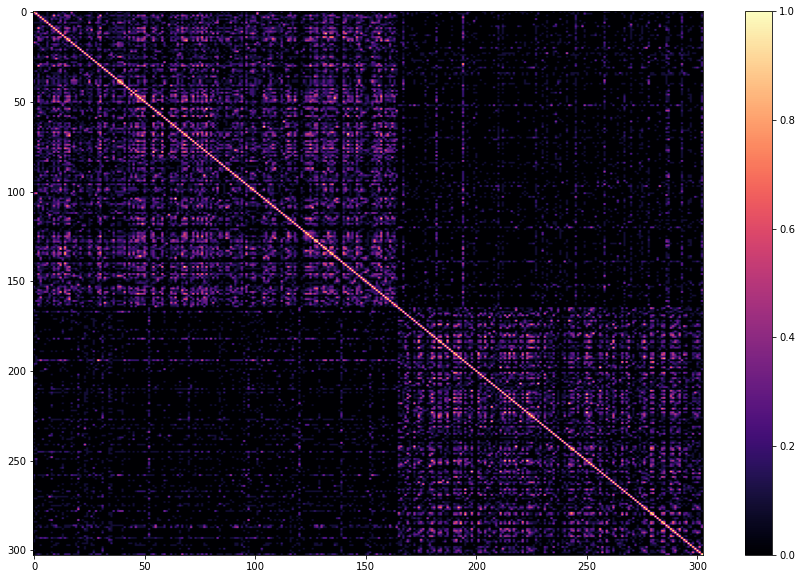

In [66]:
plt.figure(figsize=[15,10])
plt.imshow(matrix, aspect='auto', cmap='magma')
plt.colorbar()